### 1) Cargar dataset limpiado

In [ ]:
import pandas as pd

# Configuración para mostrar todas las columnas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

# URL cruda del archivo CSV en GitHub
url = 'https://github.com/jcastilloc168/PythonUDD_ProyectoFinal/raw/main/data/BaseDefinitivaINDICES-2005-2024_cleaned.csv'

# Leer el archivo CSV desde GitHub
df_clean = pd.read_csv(url, delimiter=';')

## Mostrar las primeras cinco filas
print(df_clean.head())

# 2) Creacion de nuevas variables 

### 2.1) Nueva columna con la macro zonas del pais

Con la finalidad de hacer un estudio con el comportamiento de las macrozonas del pais en la relacion a la matricula en educación superior, crearemos una variable denomina "Macrozona". Para el caso de la región metropolitana se dejará como "Metropolitana".

In [ ]:
# Definir un diccionario para mapear las regiones a sus macrozonas correspondientes
macrozona_map = {
    "Region de Arica y Parinacota": "Macrozona Norte",
    "Region de Tarapaca": "Macrozona Norte",
    "Region de Antofagasta": "Macrozona Norte",
    "Region de Atacama": "Macrozona Norte",
    "Region de Coquimbo": "Macrozona Centro",
    "Region de Valparaiso": "Macrozona Centro",
    "Region del Gral. B. O`Higgins": "Macrozona Centro Sur",
    "Region del Maule": "Macrozona Centro Sur",
    "Region de Nuble": "Macrozona Centro Sur",
    "Region del Bio-Bio": "Macrozona Centro Sur",
    "Region de La Araucania": "Macrozona Sur",
    "Region de Los Lagos": "Macrozona Sur",
    "Region de los Rios": "Macrozona Sur",
    "Region de Aysen": "Macrozona Austral",
    "Region de Magallanes": "Macrozona Austral"
}

# Crear la nueva columna de macrozonas
df_clean['Macrozona'] = df_clean['Nombre_Region'].map(macrozona_map)

# Para las regiones que no estén en el diccionario (como Región Metropolitana), dejamos la región igual
df_clean['Macrozona'].fillna(df_clean['Nombre_Region'], inplace=True)

print(df_clean.head())

### 2.2) Creación de nuevas variables de porcentaje de estudiantes y costo total carrera

In [ ]:
# Crear nuevas variables relacionadas con la matrícula

# Porcentaje de Matriculados Primer Año Extranjeros
df_clean['Porcentaje_Matricula_Primer_Anio_Extranjeros'] = (df_clean['Matricula_Primer_Anio_Extranjeros'] / df_clean['Matricula_Primer_Anio']) * 100

# Porcentaje de Matriculados Total Extranjeros
df_clean['Porcentaje_Matricula_Total_Extranjeros'] = (df_clean['Matricula_Total_Extranjeros'] / df_clean['Matricula_Total']) * 100

# Porcentaje de Matriculados Primer Año Hombres
df_clean['Porcentaje_Matricula_Primer_Anio_Hombres'] = (df_clean['Matricula_Primer_Anio_Hombres'] / df_clean['Matricula_Primer_Anio']) * 100

# Porcentaje de Matriculados Primer Año Mujeres
df_clean['Porcentaje_Matricula_Primer_Anio_Mujeres'] = (df_clean['Matricula_Primer_Anio_Mujeres'] / df_clean['Matricula_Primer_Anio']) * 100

# Porcentaje de Matriculados Total Hombres
df_clean['Porcentaje_Matricula_Total_Hombres'] = (df_clean['Matricula_Total_Hombres'] / df_clean['Matricula_Total']) * 100

# Porcentaje de Matriculados Total Mujeres
df_clean['Porcentaje_Matricula_Total_Mujeres'] = (df_clean['Matricula_Total_Mujeres'] / df_clean['Matricula_Total']) * 100

# Costo Total de Educación
df_clean['Costo_Total_Programa'] = df_clean['Valor_Matricula'] + df_clean['Valor_Arancel']

# Mostrar las primeras filas para verificar las nuevas columnas
print(df_clean.head())

# 3) Visualizaciones del dataset

### 3.1) Evolución de la matricula nueva por año y por genero

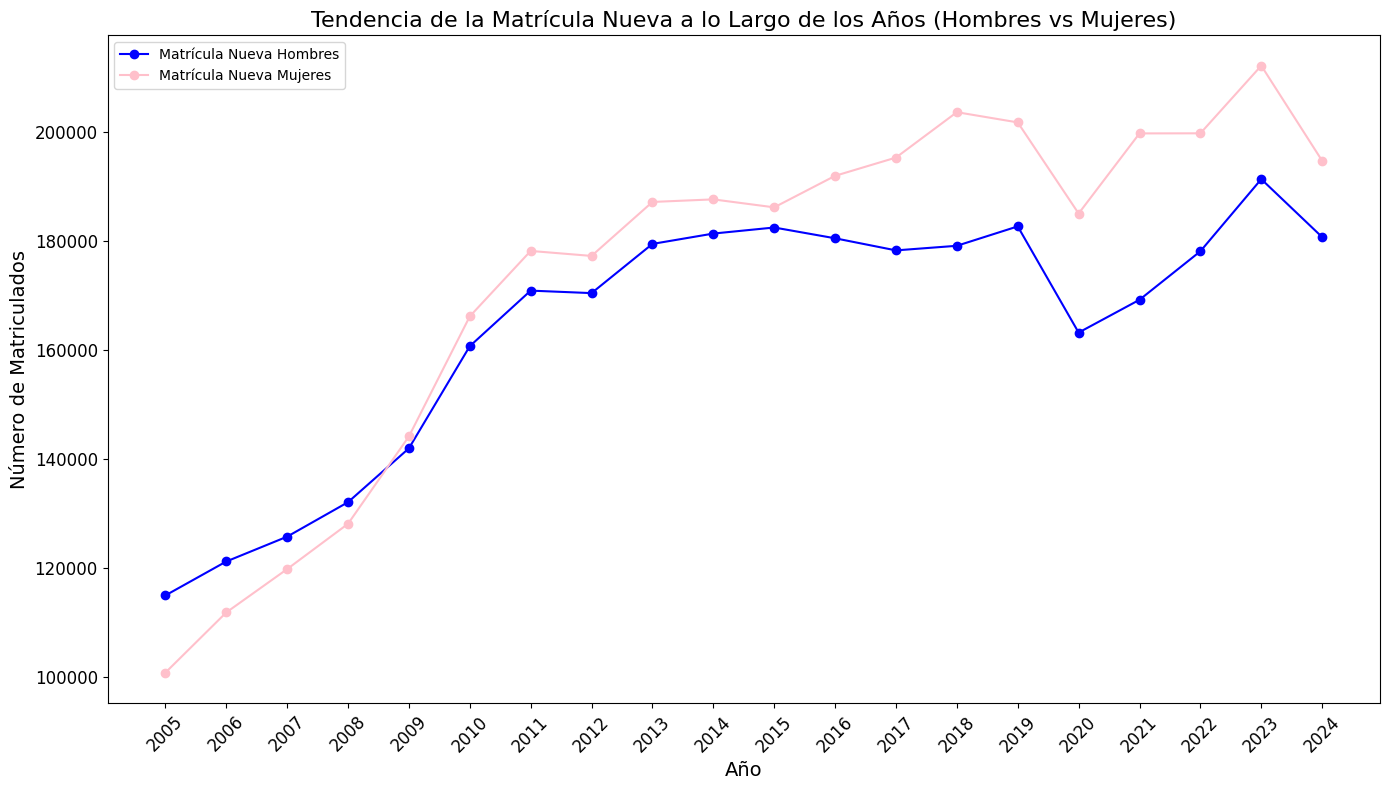

In [5]:
import matplotlib.pyplot as plt

# Tendencia de la matrícula nueva a lo largo de los años diferenciando entre hombres y mujeres
plt.figure(figsize=(14, 8))
matricula_nueva_hombres_por_anio = df_clean.groupby('Anio')['Matricula_Primer_Anio_Hombres'].sum()
matricula_nueva_mujeres_por_anio = df_clean.groupby('Anio')['Matricula_Primer_Anio_Mujeres'].sum()

# Graficar ambas series
ax = matricula_nueva_hombres_por_anio.plot(kind='line', color='blue', marker='o', label='Matrícula Nueva Hombres')
ax = matricula_nueva_mujeres_por_anio.plot(kind='line', color='pink', marker='o', label='Matrícula Nueva Mujeres')

# Configurar título y etiquetas
plt.title('Tendencia de la Matrícula Nueva a lo Largo de los Años (Hombres vs Mujeres)', fontsize=16)
plt.ylabel('Número de Matriculados', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(ticks=matricula_nueva_hombres_por_anio.index, labels=matricula_nueva_hombres_por_anio.index.astype(int), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### 3.2) Evolución de la matricula total por año y por genero

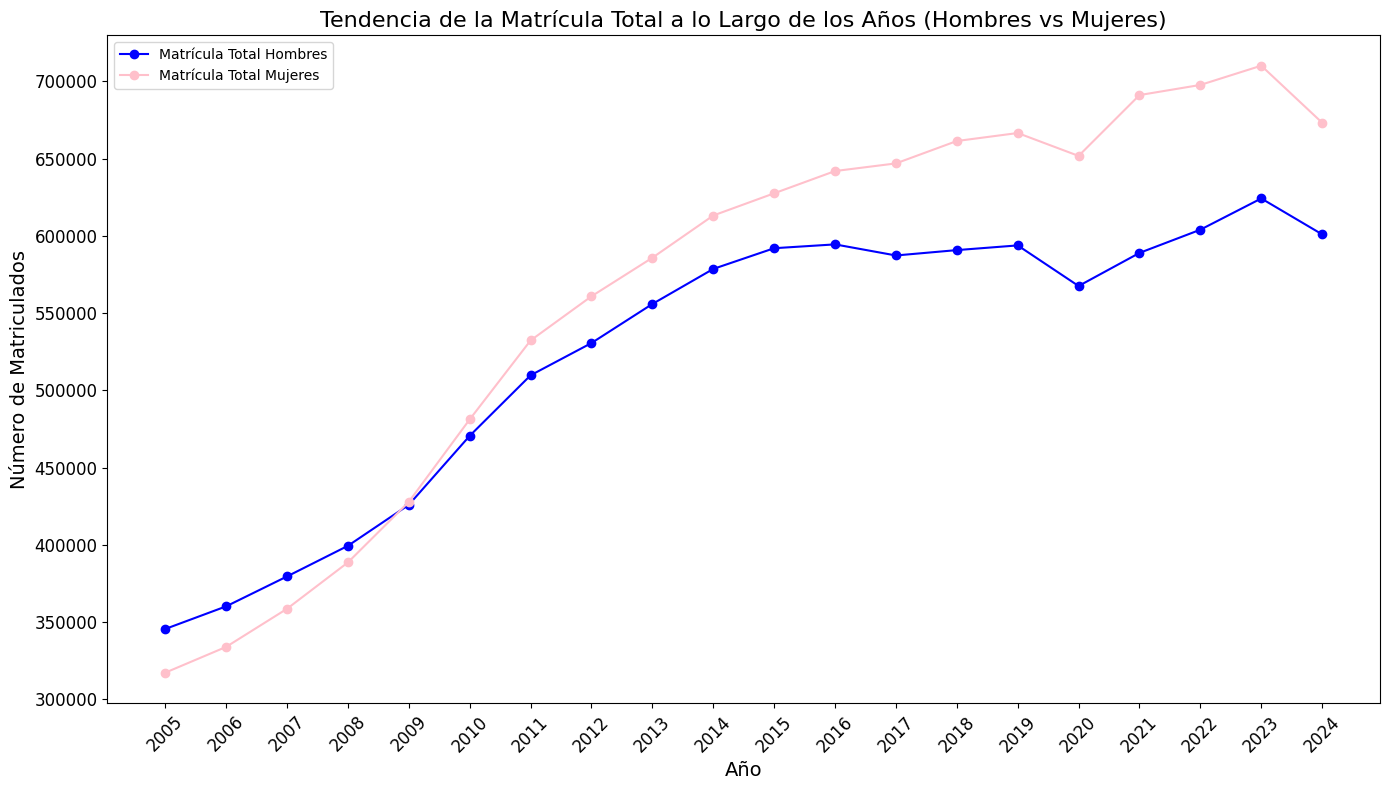

In [6]:
# Tendencia de la matrícula total a lo largo de los años diferenciando entre hombres y mujeres
plt.figure(figsize=(14, 8))
matricula_total_hombres_por_anio = df_clean.groupby('Anio')['Matricula_Total_Hombres'].sum()
matricula_total_mujeres_por_anio = df_clean.groupby('Anio')['Matricula_Total_Mujeres'].sum()

# Graficar ambas series
ax = matricula_total_hombres_por_anio.plot(kind='line', color='blue', marker='o', label='Matrícula Total Hombres')
ax = matricula_total_mujeres_por_anio.plot(kind='line', color='pink', marker='o', label='Matrícula Total Mujeres')

# Configurar título y etiquetas
plt.title('Tendencia de la Matrícula Total a lo Largo de los Años (Hombres vs Mujeres)', fontsize=16)
plt.ylabel('Número de Matriculados', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(ticks=matricula_total_hombres_por_anio.index, labels=matricula_total_hombres_por_anio.index.astype(int), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend()

plt.tight_layout()
plt.show()

### 3.3) Porcentaje de genero de la matrícula total por Región

<Figure size 1400x800 with 0 Axes>

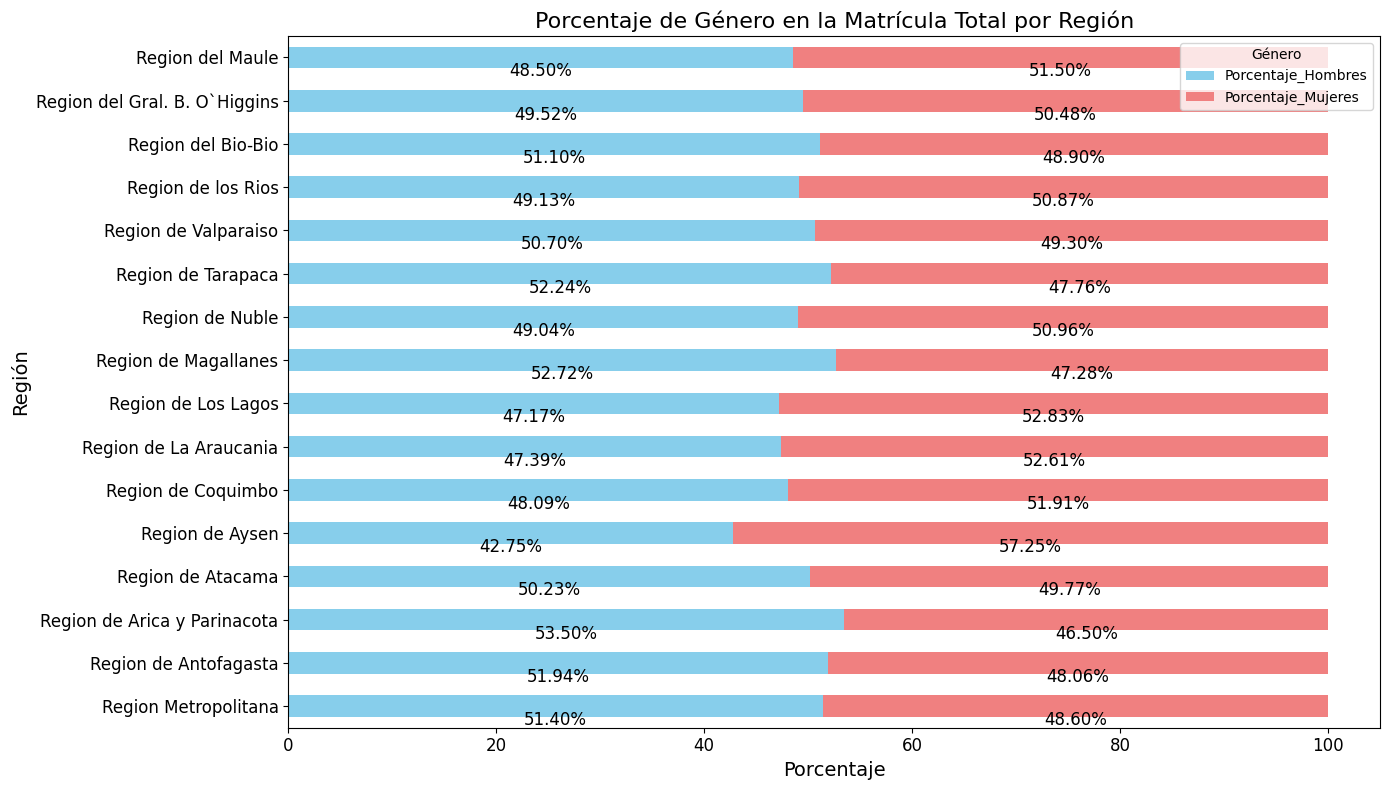

In [7]:
# Agrupar los datos por región
df_gender_pct = df_clean.groupby('Nombre_Region')[['Porcentaje_Matricula_Total_Hombres', 'Porcentaje_Matricula_Total_Mujeres']].mean()

# Mejorar el gráfico de relación de género en la matrícula total por región
plt.figure(figsize=(14, 8))
ax = df_gender_pct.plot(kind='barh', stacked=True, figsize=(14, 8), color=['skyblue', 'lightcoral'])
plt.title('Porcentaje de Género en la Matrícula Total por Región', fontsize=16)
plt.xlabel('Porcentaje', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for i in range(len(df_gender_pct)):
    pct_hombres = df_gender_pct.iloc[i, 0]
    pct_mujeres = df_gender_pct.iloc[i, 1]
    ax.annotate(f'{pct_hombres:.2f}%', 
                (pct_hombres / 2, i), 
                ha='center', va='center', 
                xytext=(0, -10), 
                textcoords='offset points', fontsize=12, color='black')
    ax.annotate(f'{pct_mujeres:.2f}%', 
                (pct_hombres + pct_mujeres / 2, i), 
                ha='center', va='center', 
                xytext=(0, -10), 
                textcoords='offset points', fontsize=12, color='black')

plt.legend(['Porcentaje_Hombres', 'Porcentaje_Mujeres'], title='Género')
plt.tight_layout()
plt.show()

### 3.4) Distribucion de la matricula total por Región

Este grafico muestra la cantidad total de matriculados por Región en los años 2005-2024. Se muestra que Región Metropolitana tiene la mayor cantidad de estudiantes de educación superior, seguido por la region de Valparaiso y Bio-Bio.

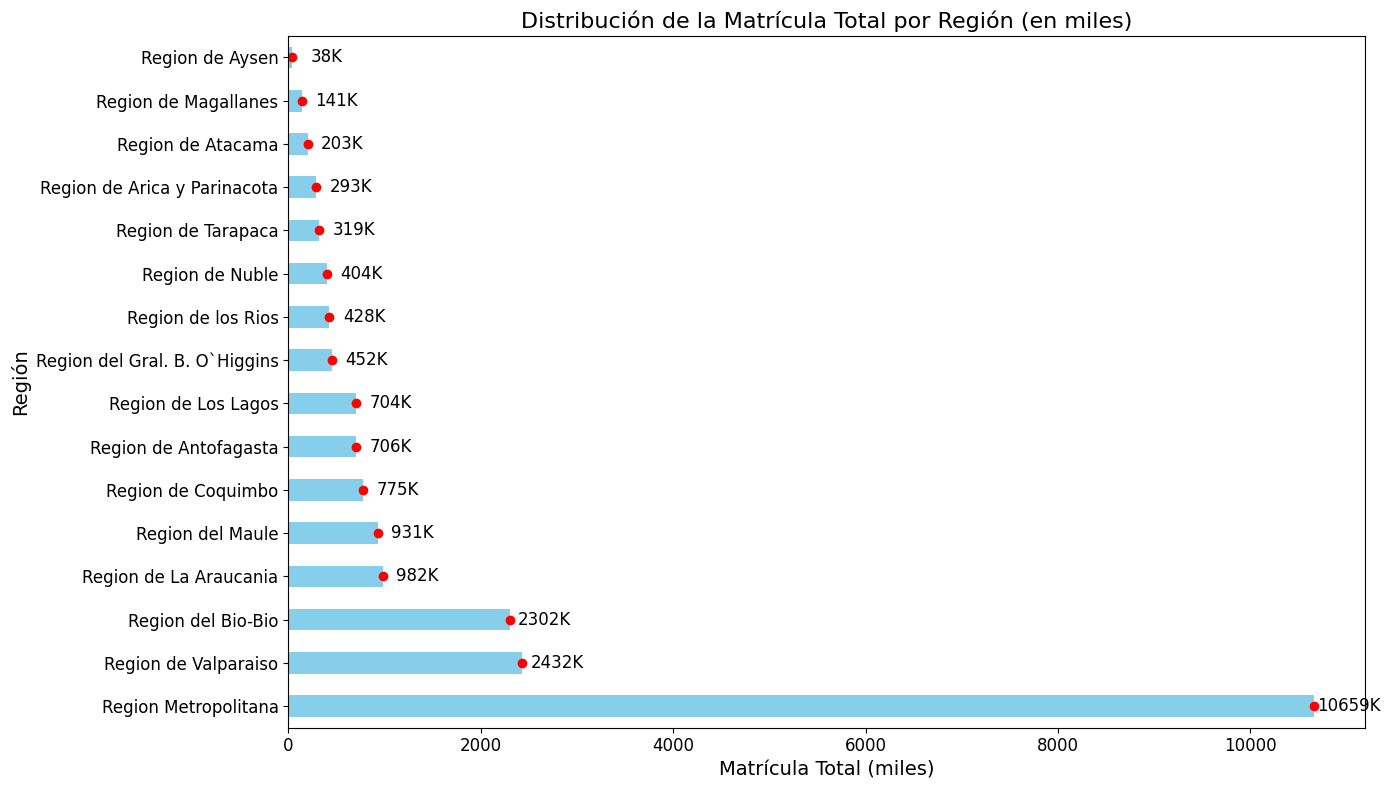

In [8]:
# 1. Distribución de la Matrícula Total por Región
import matplotlib.pyplot as plt

# Agrupar y ordenar los datos por matrícula total y convertir a miles
matricula_total_por_region = df_clean.groupby('Nombre_Region')['Matricula_Total'].sum().sort_values(ascending=False) / 1e3

# Mejorar el gráfico de distribución de la matrícula total por región
plt.figure(figsize=(14, 8))
ax = matricula_total_por_region.plot(kind='barh', color='skyblue')
plt.title('Distribución de la Matrícula Total por Región (en miles)', fontsize=16)
plt.xlabel('Matrícula Total (miles)', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}K', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                xytext=(25, 0), 
                textcoords='offset points', fontsize=12)

# Añadir puntos al final de las barras
for p in ax.patches:
    plt.plot(p.get_width(), p.get_y() + p.get_height() / 2, 'ro')

plt.tight_layout()
plt.show()

### 3.5) Distribucion de la matricula total por Macrozonas del País (Excluye la Region Metropolitana)

Con la finalidad se visualizar el aporte que tiene las Regiones a la cantidad de estudiantes en educación superior, se presenta el siguiente gráfico

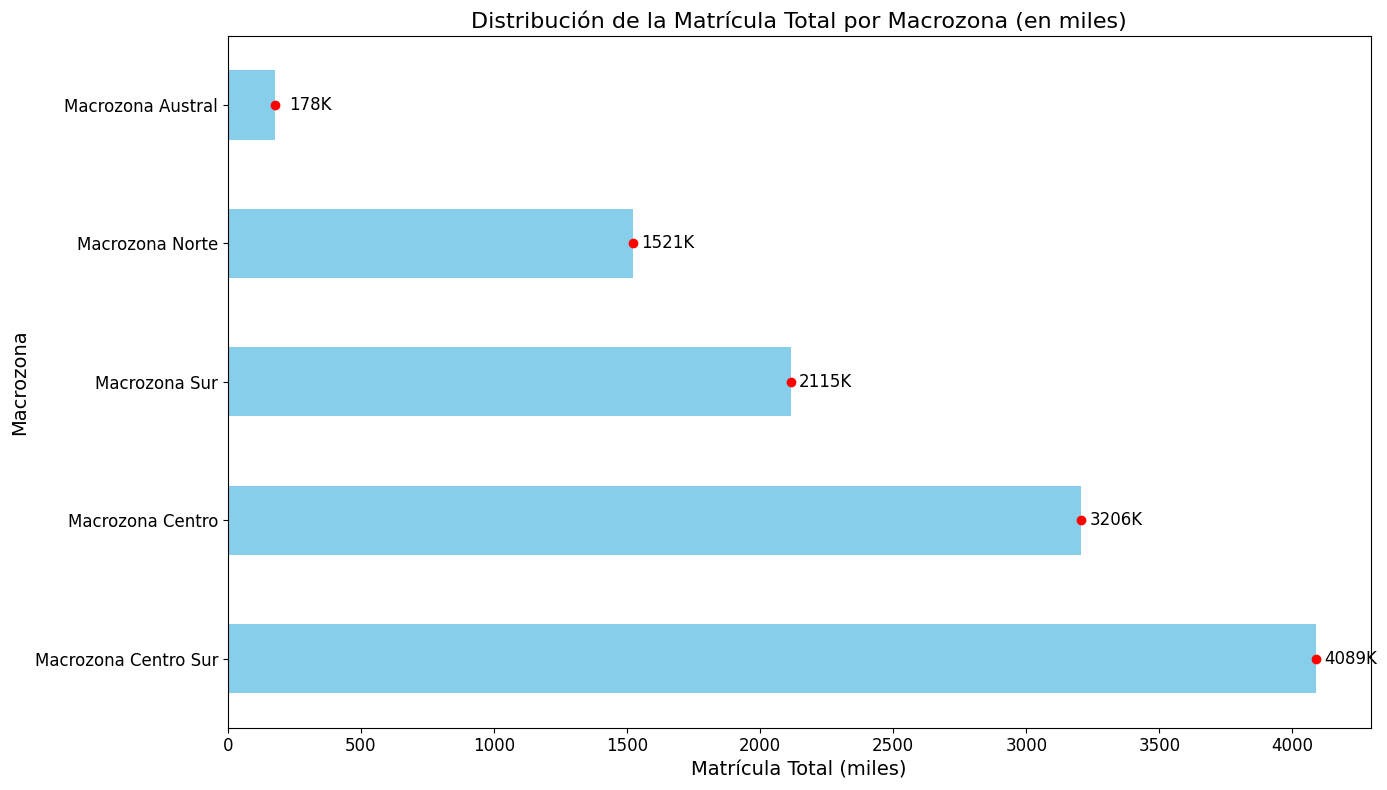

In [9]:
# Excluir la Región Metropolitana
df_filtered = df_clean[df_clean['Nombre_Region'] != 'Region Metropolitana']

# Agrupar y ordenar los datos por macrozona y convertir a miles
matricula_total_por_macrozona = df_filtered.groupby('Macrozona')['Matricula_Total'].sum().sort_values(ascending=False) / 1e3

# Mejorar el gráfico de distribución de la matrícula total por macrozona
plt.figure(figsize=(14, 8))
ax = matricula_total_por_macrozona.plot(kind='barh', color='skyblue')
plt.title('Distribución de la Matrícula Total por Macrozona (en miles)', fontsize=16)
plt.xlabel('Matrícula Total (miles)', fontsize=14)
plt.ylabel('Macrozona', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_width():.0f}K', 
                (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', 
                xytext=(25, 0), 
                textcoords='offset points', fontsize=12)

# Añadir puntos al final de las barras
for p in ax.patches:
    plt.plot(p.get_width(), p.get_y() + p.get_height() / 2, 'ro')

plt.tight_layout()
plt.show()

### 3.6) Distribucion de la matricula total de estudiantes extranjeros por Región

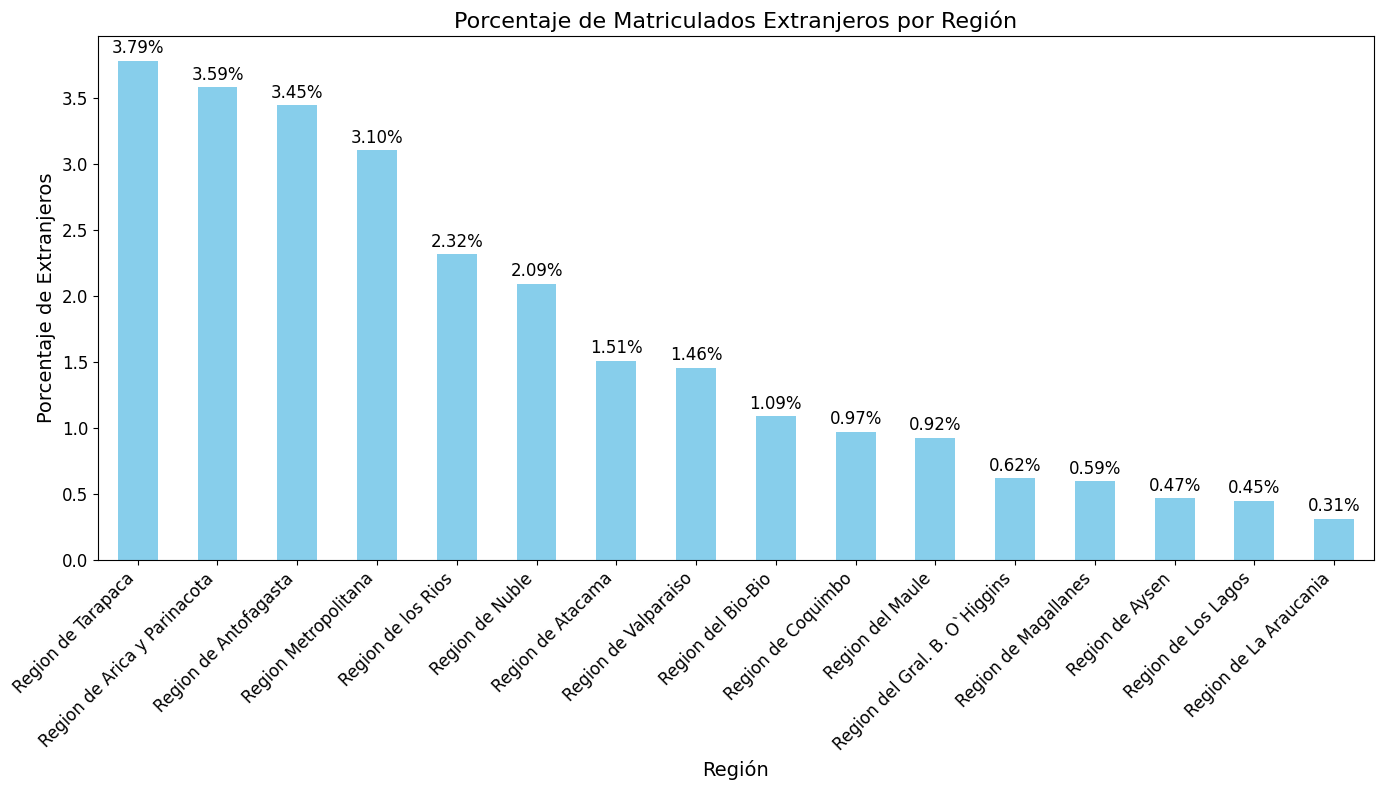

In [10]:
# Agrupar y ordenar los datos por porcentaje de matriculados extranjeros
porcentaje_extranjeros_por_region = df_clean.groupby('Nombre_Region')['Porcentaje_Matricula_Total_Extranjeros'].mean().sort_values(ascending=False)

# Mejorar el gráfico de porcentaje de matriculados extranjeros por región
plt.figure(figsize=(14, 8))
ax = porcentaje_extranjeros_por_region.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de Matriculados Extranjeros por Región', fontsize=16)
plt.ylabel('Porcentaje de Extranjeros', fontsize=14)
plt.xlabel('Región', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Añadir etiquetas de valores en las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}%', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 9), 
                textcoords='offset points', fontsize=12)

plt.tight_layout()
plt.show()

### 3.7) Mapa de calor de la matricula nueva por área de conocimiento y por año

Este mapa de calor permite observar las tendencias y variaciones en la matrícula nueva por área de conocimiento a lo largo de los años. Es especialmente útil para identificar patrones, puntos de cambio y áreas que han experimentado un crecimiento o disminución significativa en la inscripción de nuevos estudiantes. En el grafico se muestra una tendencia clara a programas del área de conocimiento de "Tecnologia".

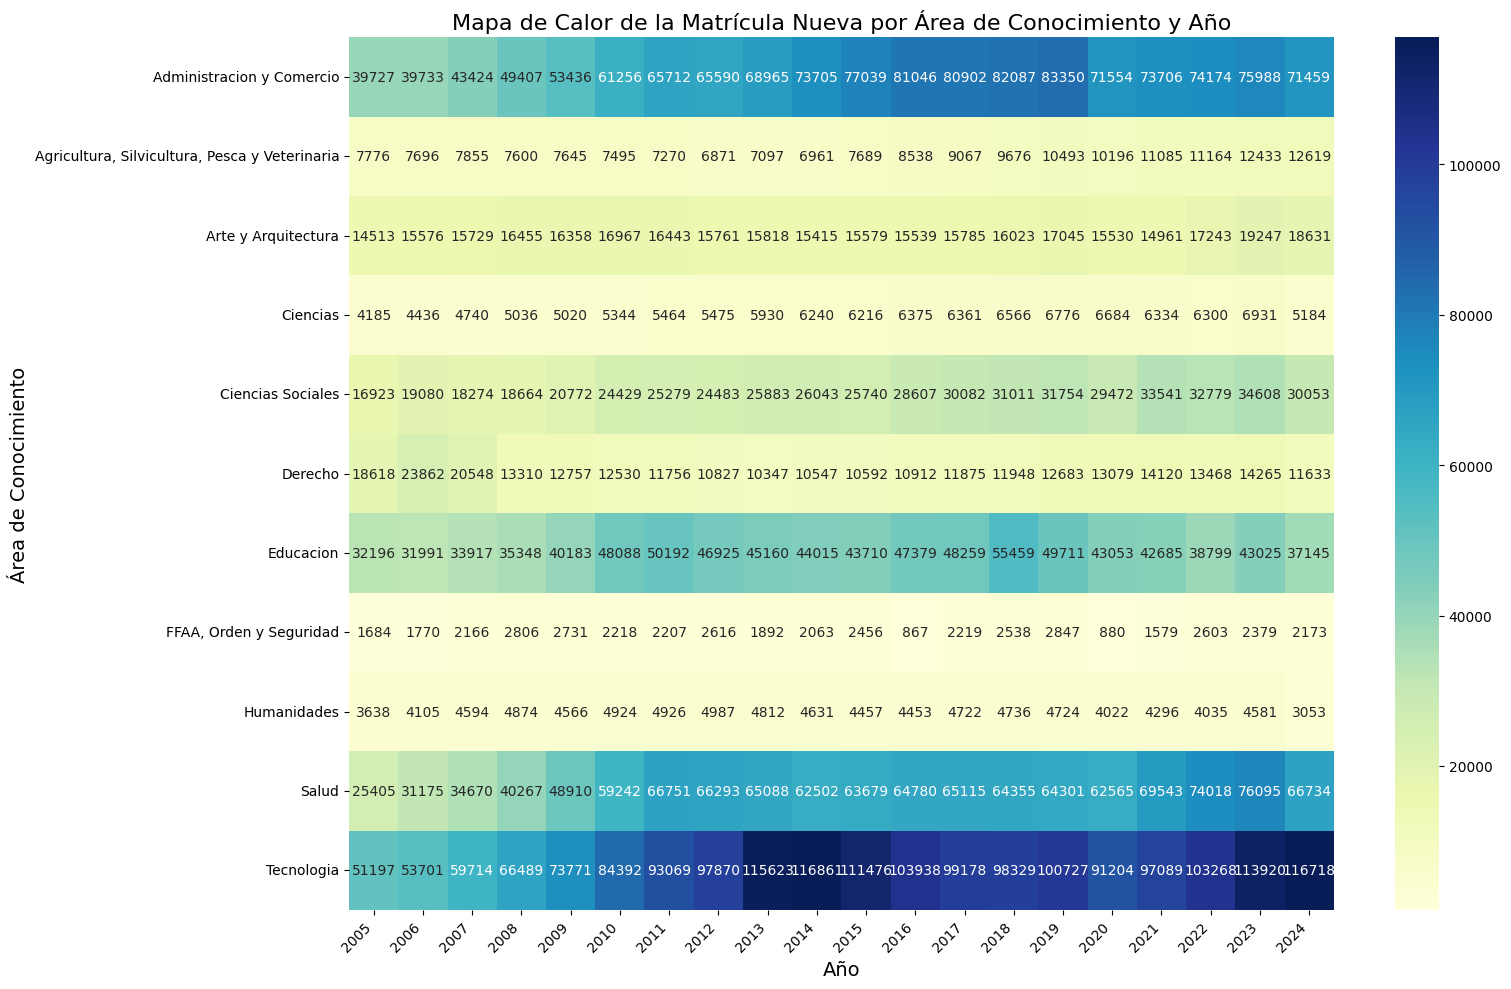

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupar los datos por año y área de conocimiento y sumar la matrícula de primer año
matricula_nueva_area_anio = df_clean.groupby(['Anio', 'Area_Conocimiento'])['Matricula_Primer_Anio'].sum().unstack().fillna(0)

# Crear el mapa de calor con los ejes intercambiados
plt.figure(figsize=(16, 10))
ax = sns.heatmap(matricula_nueva_area_anio.T, cmap='YlGnBu', annot=True, fmt='g')

# Configurar título y etiquetas
plt.title('Mapa de Calor de la Matrícula Nueva por Área de Conocimiento y Año', fontsize=16)
plt.ylabel('Área de Conocimiento', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=10)  # Ajustar rotación y alineación de etiquetas del eje x
plt.yticks(fontsize=10)  # Ajustar tamaño de fuente de etiquetas del eje y

plt.tight_layout()
plt.show()

### 3.8) Tendencia de la matricula de primer año por área de conocimiento

Este gráfico de líneas muestra cómo ha cambiado la matrícula nueva en diferentes áreas de conocimiento a lo largo del tiempo.

<Figure size 1400x1000 with 0 Axes>

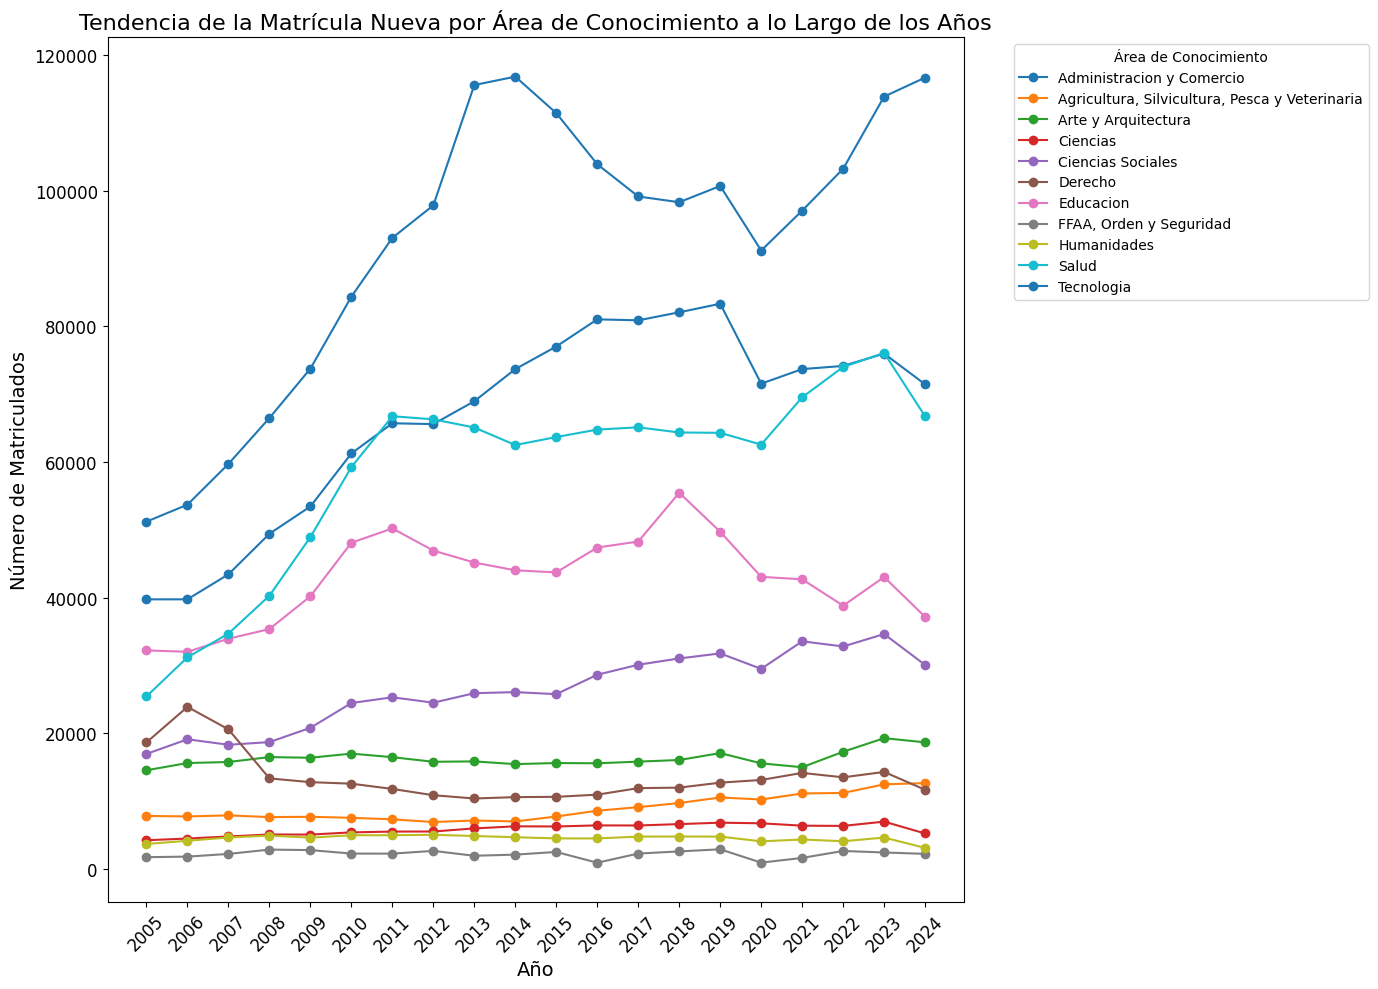

In [16]:
# Agrupar los datos por año y área de conocimiento y sumar la matrícula de primer año
matricula_nueva_area_anio = df_clean.groupby(['Anio', 'Area_Conocimiento'])['Matricula_Primer_Anio'].sum().unstack().fillna(0)

# Graficar la tendencia de la matrícula nueva por área de conocimiento
plt.figure(figsize=(14, 10))
ax = matricula_nueva_area_anio.plot(kind='line', marker='o', figsize=(14, 10))

# Configurar título y etiquetas
plt.title('Tendencia de la Matrícula Nueva por Área de Conocimiento a lo Largo de los Años', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Matriculados', fontsize=14)
plt.xticks(matricula_nueva_area_anio.index, rotation=45, fontsize=12)  # Usar los valores enteros de los años en el eje x
plt.yticks(fontsize=12)
plt.legend(title='Área de Conocimiento', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

### 3.9) Mapa de calor del área del conocimiento por Macrozonas del Pais

Este mapa de calor muestra la distribución de la matrícula nueva por área de conocimiento y macrozona del pais. Es útil para identificar patrones y comparaciones entre diferentes regiones y áreas de conocimiento.

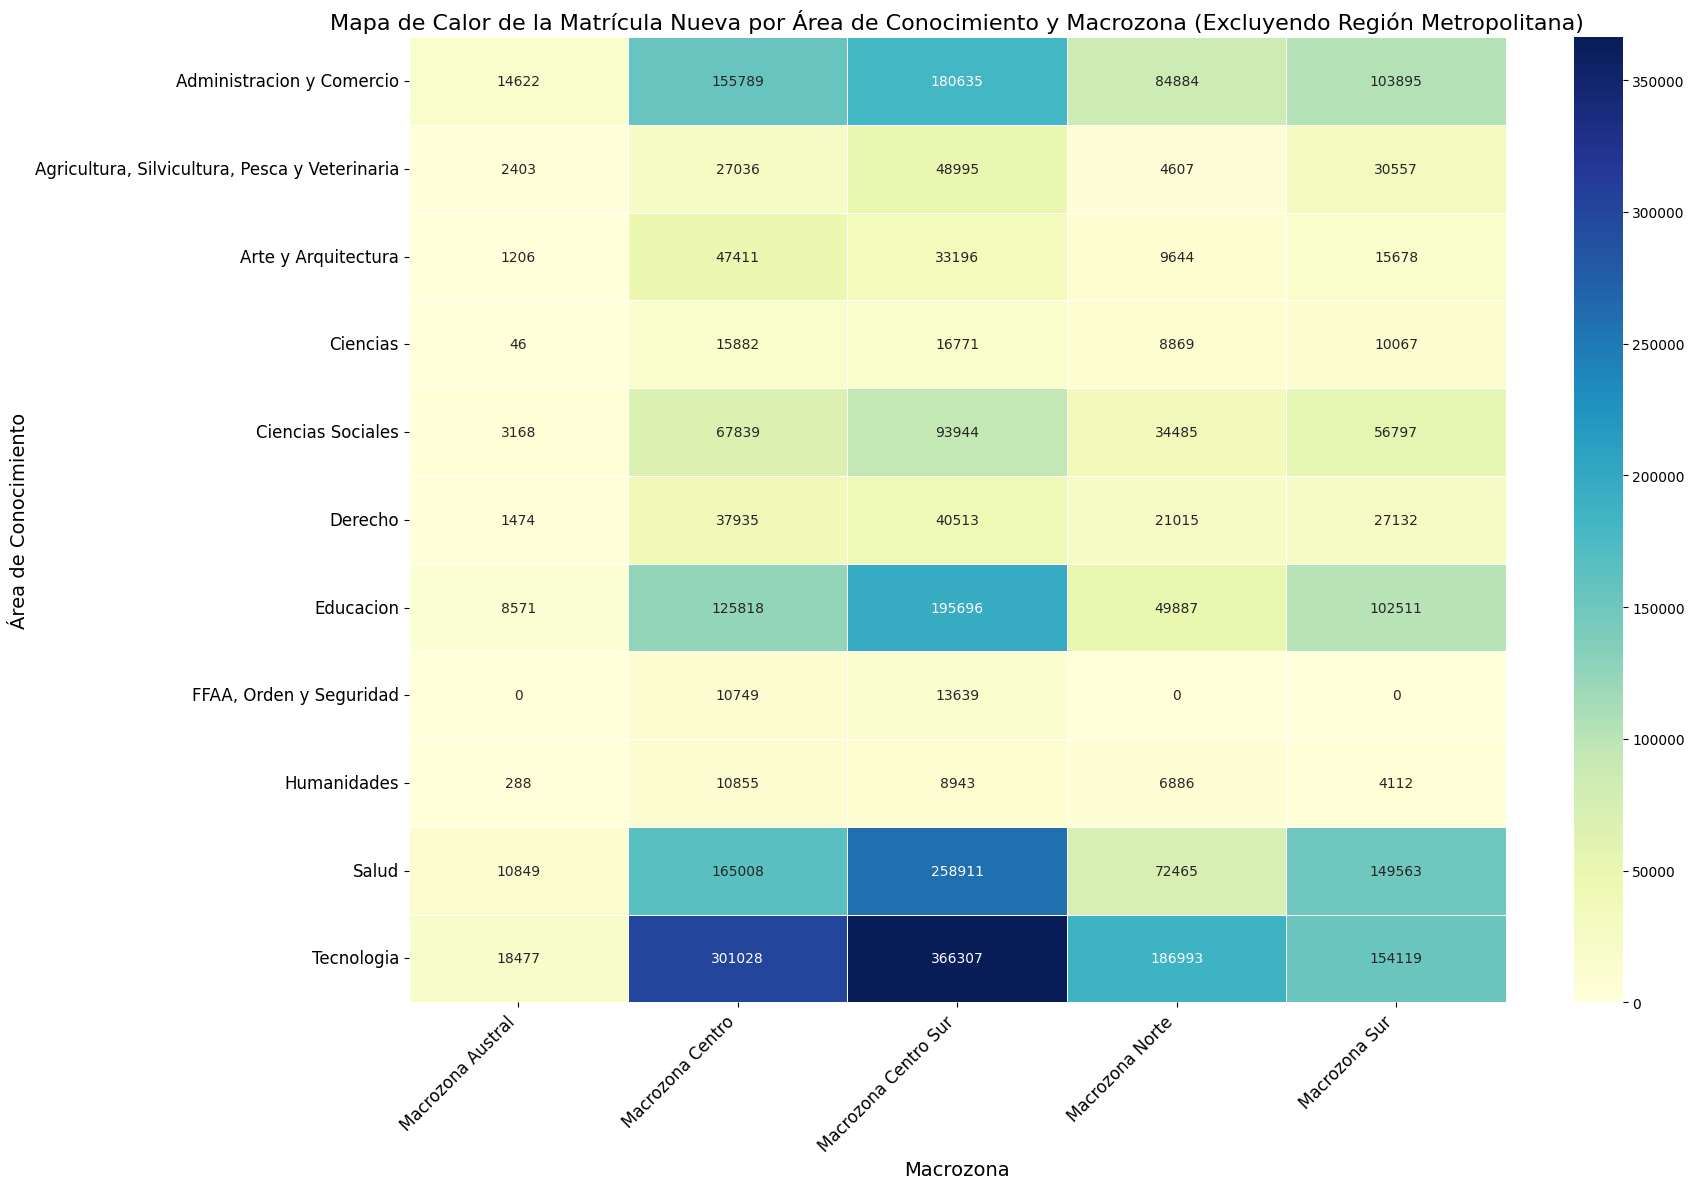

In [21]:
import seaborn as sns

# Excluir la Región Metropolitana
df_clean_excl_metropolitana = df_clean[df_clean['Macrozona'] != 'Region Metropolitana']

# Agrupar los datos por macrozona y área de conocimiento y sumar la matrícula de primer año
matricula_nueva_macrozona_area = df_clean_excl_metropolitana.groupby(['Macrozona', 'Area_Conocimiento'])['Matricula_Primer_Anio'].sum().unstack().fillna(0)

# Crear el mapa de calor con los ejes intercambiados
plt.figure(figsize=(18, 12))
ax = sns.heatmap(matricula_nueva_macrozona_area.T, cmap='YlGnBu', annot=True, fmt='g', linewidths=0.5)

# Configurar título y etiquetas
plt.title('Mapa de Calor de la Matrícula Nueva por Área de Conocimiento y Macrozona (Excluyendo Región Metropolitana)', fontsize=16)
plt.xlabel('Macrozona', fontsize=14)
plt.ylabel('Área de Conocimiento', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)  # Ajustar rotación y alineación de etiquetas del eje x
plt.yticks(fontsize=12)  # Ajustar tamaño de fuente de etiquetas del eje y

plt.tight_layout()
plt.show()

### 3.10) Tendencia de matriculados de primer año por tipo de clasificacion de la Institucion

<Figure size 1400x800 with 0 Axes>

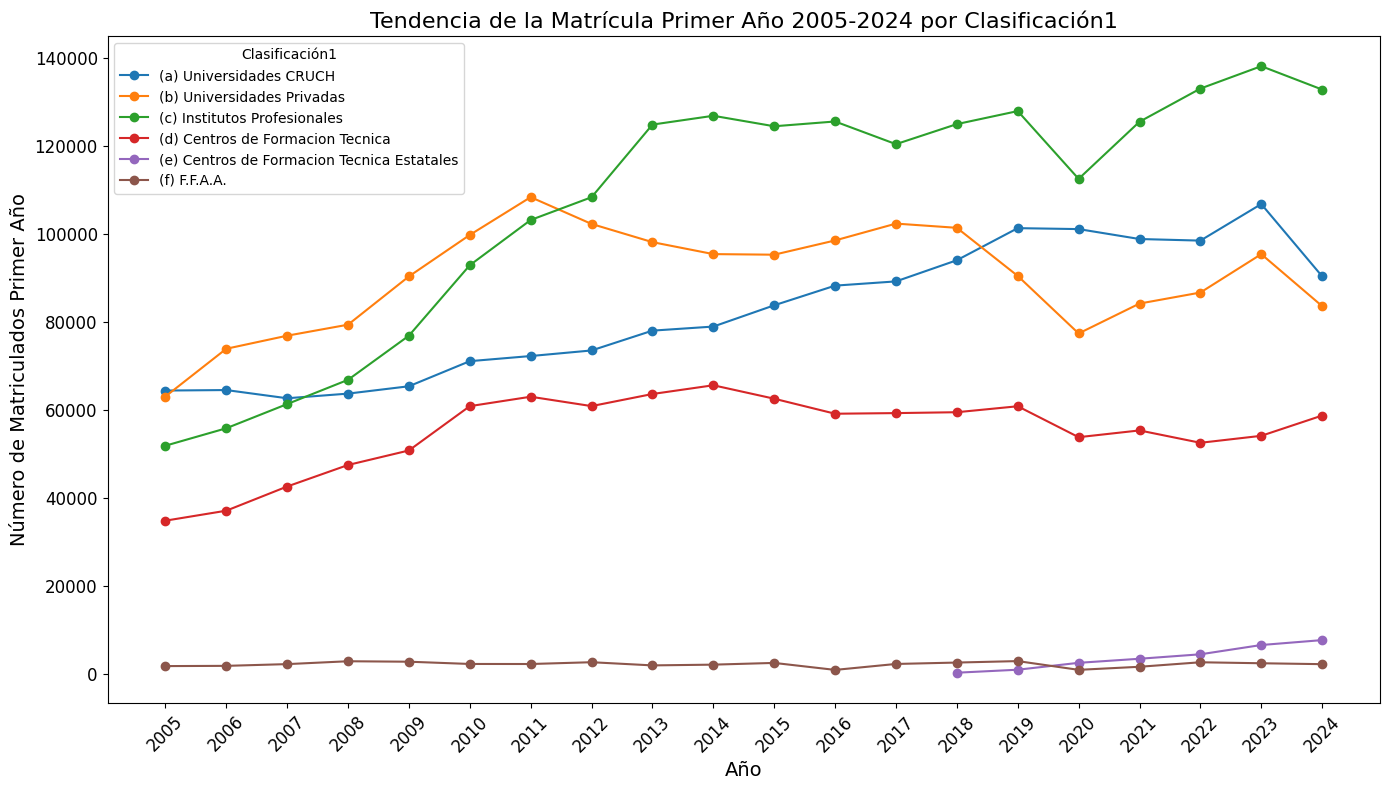

In [6]:
# Tendencia de la matrícula primer año a lo largo de los años por Clasificación2
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
clasificacion1_groups = df_clean.groupby(['Anio', 'Clasificacion1'])['Matricula_Primer_Anio'].sum().unstack()

# Graficar las series por Clasificación2
ax = clasificacion1_groups.plot(kind='line', marker='o', figsize=(14, 8))

# Configurar título y etiquetas
plt.title('Tendencia de la Matrícula Primer Año 2005-2024 por Clasificación1', fontsize=16)
plt.ylabel('Número de Matriculados Primer Año', fontsize=14)
plt.xlabel('Año', fontsize=14)
plt.xticks(ticks=clasificacion1_groups.index, labels=clasificacion1_groups.index.astype(int), rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Clasificación1', fontsize=10)

plt.tight_layout()
plt.show()

### 3.11) Tendencia de matriculados de primer año de las Universidades CRUCH

C:\Users\jcast\AppData\Local\Temp\ipykernel_11352\409627710.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(matricula_primer_anio_cruch[i], i, str(matricula_primer_anio_cruch[i]), fontsize=12, va='center')


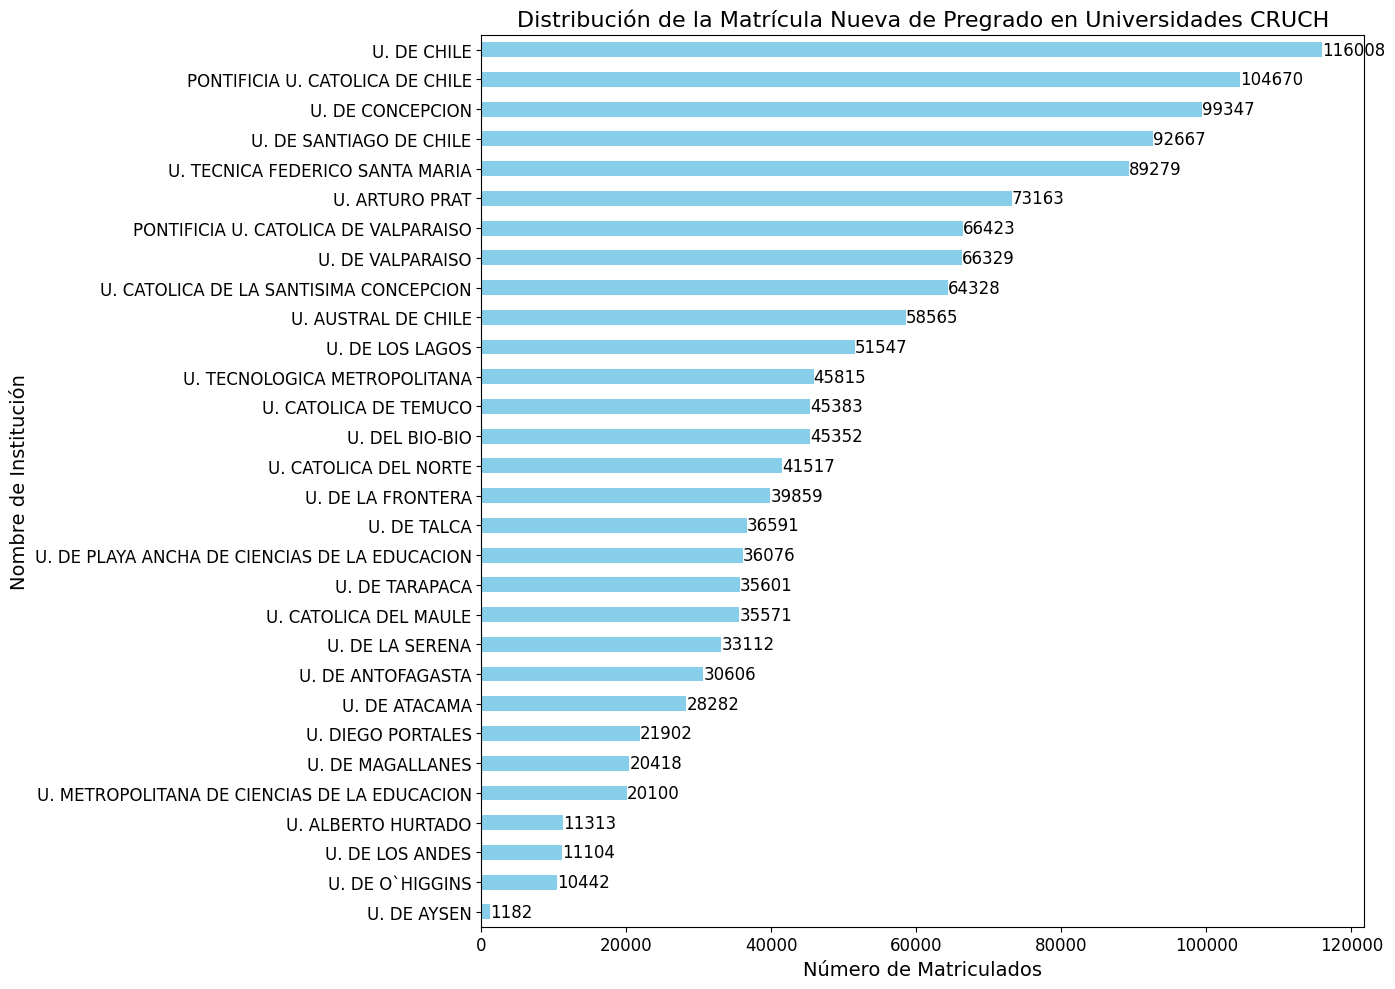

In [7]:
# Filtrar las universidades estatales CRUCH
universidades_cruch = df_clean[(df_clean['Clasificacion1'] == '(a) Universidades CRUCH') & (df_clean['Pregrado_Posgrado'] == 'Pregrado')]

# Agrupar los datos por institución y sumar la matrícula de primer año
matricula_primer_anio_cruch = universidades_cruch.groupby('Nombre_Institucion')['Matricula_Primer_Anio'].sum().sort_values()

# Graficar la serie
plt.figure(figsize=(14, 10))
ax = matricula_primer_anio_cruch.plot(kind='barh', color='skyblue')

# Añadir etiquetas de datos
for i in range(len(matricula_primer_anio_cruch)):
    plt.text(matricula_primer_anio_cruch[i], i, str(matricula_primer_anio_cruch[i]), fontsize=12, va='center')

# Configurar título y etiquetas
plt.title('Distribución de la Matrícula Nueva de Pregrado en Universidades CRUCH', fontsize=16)
plt.xlabel('Número de Matriculados', fontsize=14)
plt.ylabel('Nombre de Institución', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 3.12) Tendencia de matriculados de primer año de las Universidades Privadas en el periodo 2005-2024

C:\Users\jcast\AppData\Local\Temp\ipykernel_11352\3931704830.py:13: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(matricula_primer_anio_cruch[i], i, str(matricula_primer_anio_cruch[i]), fontsize=12, va='center')


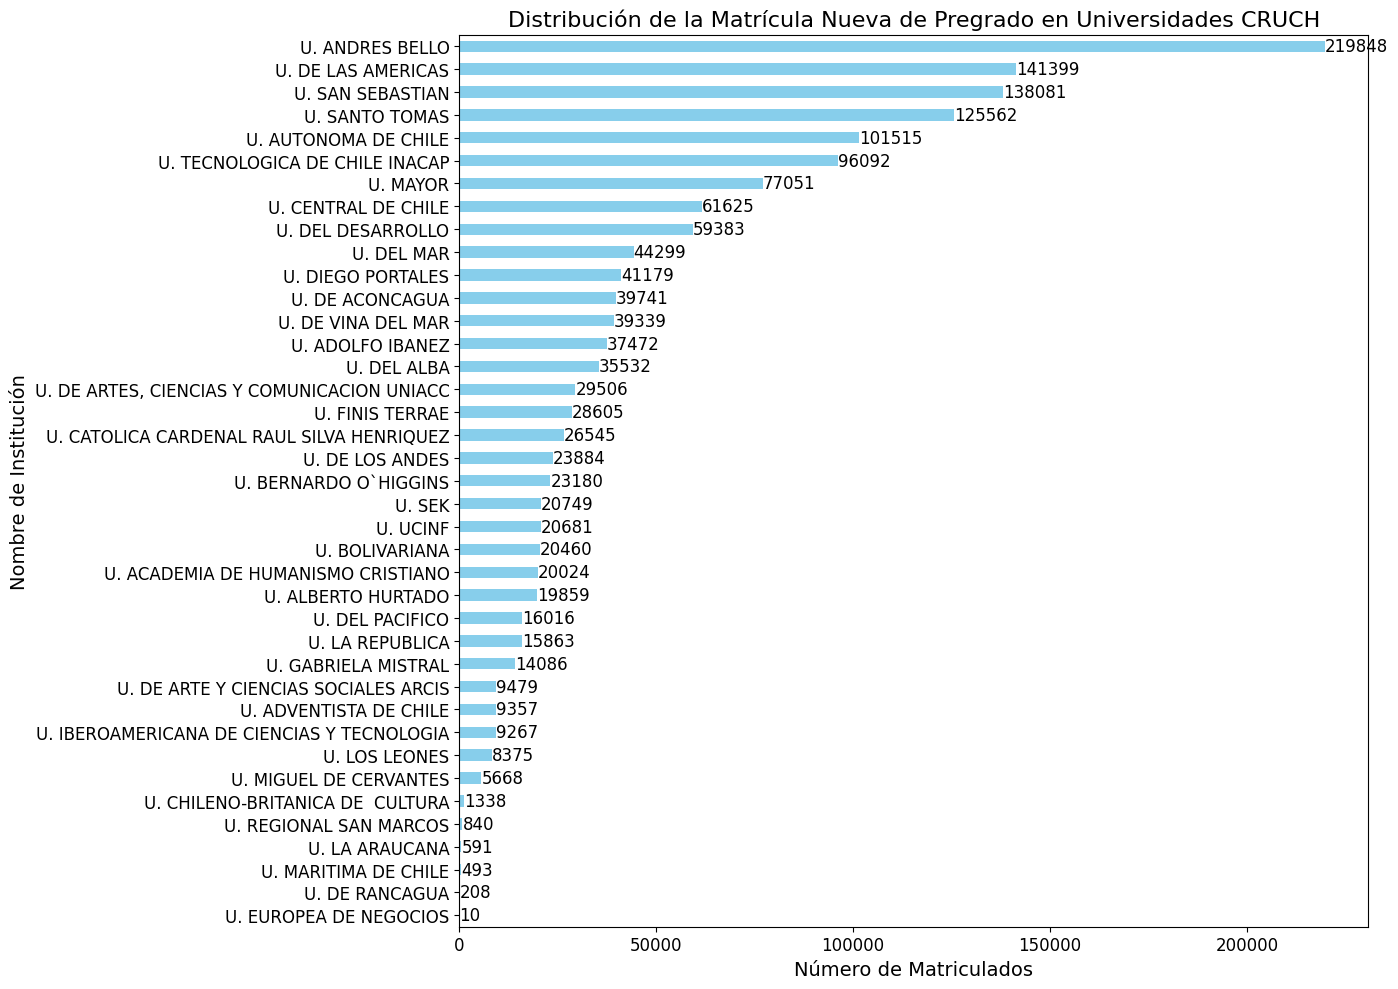

In [8]:
# Filtrar las universidades estatales CRUCH
universidades_cruch = df_clean[(df_clean['Clasificacion1'] == '(b) Universidades Privadas') & (df_clean['Pregrado_Posgrado'] == 'Pregrado')]

# Agrupar los datos por institución y sumar la matrícula de primer año
matricula_primer_anio_cruch = universidades_cruch.groupby('Nombre_Institucion')['Matricula_Primer_Anio'].sum().sort_values()

# Graficar la serie
plt.figure(figsize=(14, 10))
ax = matricula_primer_anio_cruch.plot(kind='barh', color='skyblue')

# Añadir etiquetas de datos
for i in range(len(matricula_primer_anio_cruch)):
    plt.text(matricula_primer_anio_cruch[i], i, str(matricula_primer_anio_cruch[i]), fontsize=12, va='center')

# Configurar título y etiquetas
plt.title('Distribución de la Matrícula Nueva de Pregrado en Universidades CRUCH', fontsize=16)
plt.xlabel('Número de Matriculados', fontsize=14)
plt.ylabel('Nombre de Institución', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 3.13) Boxplot con el costo total de programas entre Universidades CRUCH y Universidades Privadas

Estos boxplots muestran la variabilidad y la distribución del costo total del programa (matrícula + arancel) en universidades CRUCH y privadas. Permiten observar si hay diferencias significativas en los costos y la dispersión de los valores entre ambos tipos de universidades.

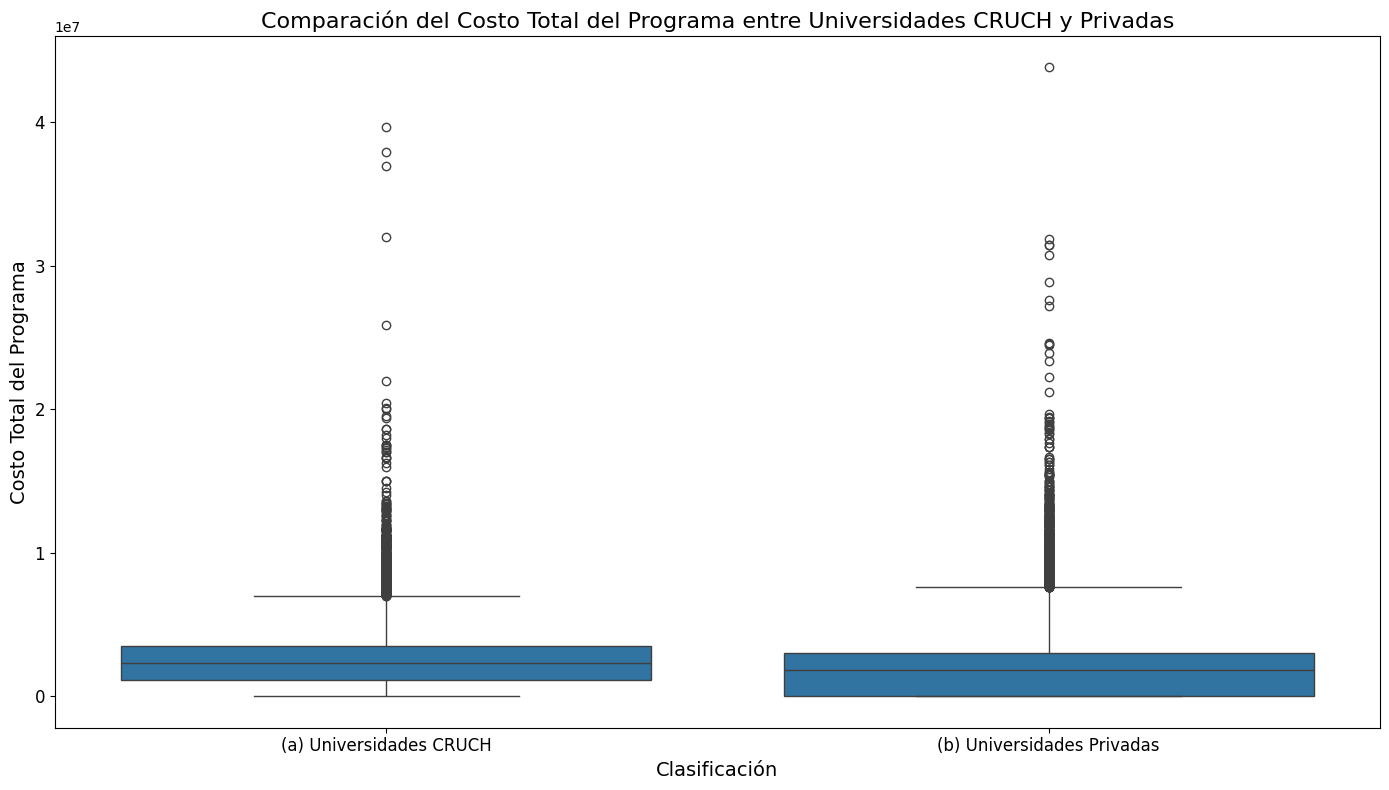

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar los datos para universidades CRUCH y privadas
universidades_cruch_privadas = df_clean[df_clean['Clasificacion1'].isin(['(a) Universidades CRUCH', '(b) Universidades Privadas'])]

# Crear el boxplot para comparar el costo total del programa entre universidades CRUCH y privadas
plt.figure(figsize=(14, 8))
sns.boxplot(x='Clasificacion1', y='Costo_Total_Programa', data=universidades_cruch_privadas)

# Configurar título y etiquetas
plt.title('Comparación del Costo Total del Programa entre Universidades CRUCH y Privadas', fontsize=16)
plt.xlabel('Clasificación', fontsize=14)
plt.ylabel('Costo Total del Programa', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 3.14) Violin Plot: Costo Total del Programa por tipo de institución

El gráfico de violín muestra la distribución del costo total del programa (Costo_Total_Programa) para diferentes tipos de instituciones (Tipo_Institucion). Cada violín representa la densidad de la distribución de los costos dentro de una categoría específica de institución. La anchura de las partes del violín indica la frecuencia relativa de los datos a lo largo de la variable Costo_Total_Programa.

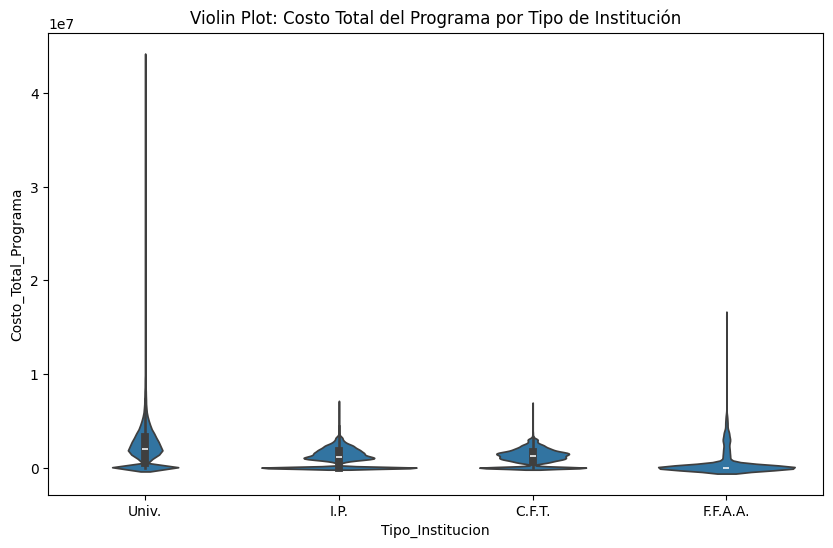

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.violinplot(x='Tipo_Institucion', y='Costo_Total_Programa', data=df_clean)
plt.title('Violin Plot: Costo Total del Programa por Tipo de Institución')
plt.show()

### 3.15) Evoluacion del costo total promedio de los programas de educación superior.

El gráfico de línea muestra la evolución del costo total promedio de los programas de estudio desde 2005 hasta 2024. Este gráfico permite identificar tendencias de aumento o disminución en los costos a lo largo del tiempo, facilita la planificación financiera para instituciones y estudiantes, y apoya la toma de decisiones informadas sobre políticas educativas y ajustes presupuestarios.

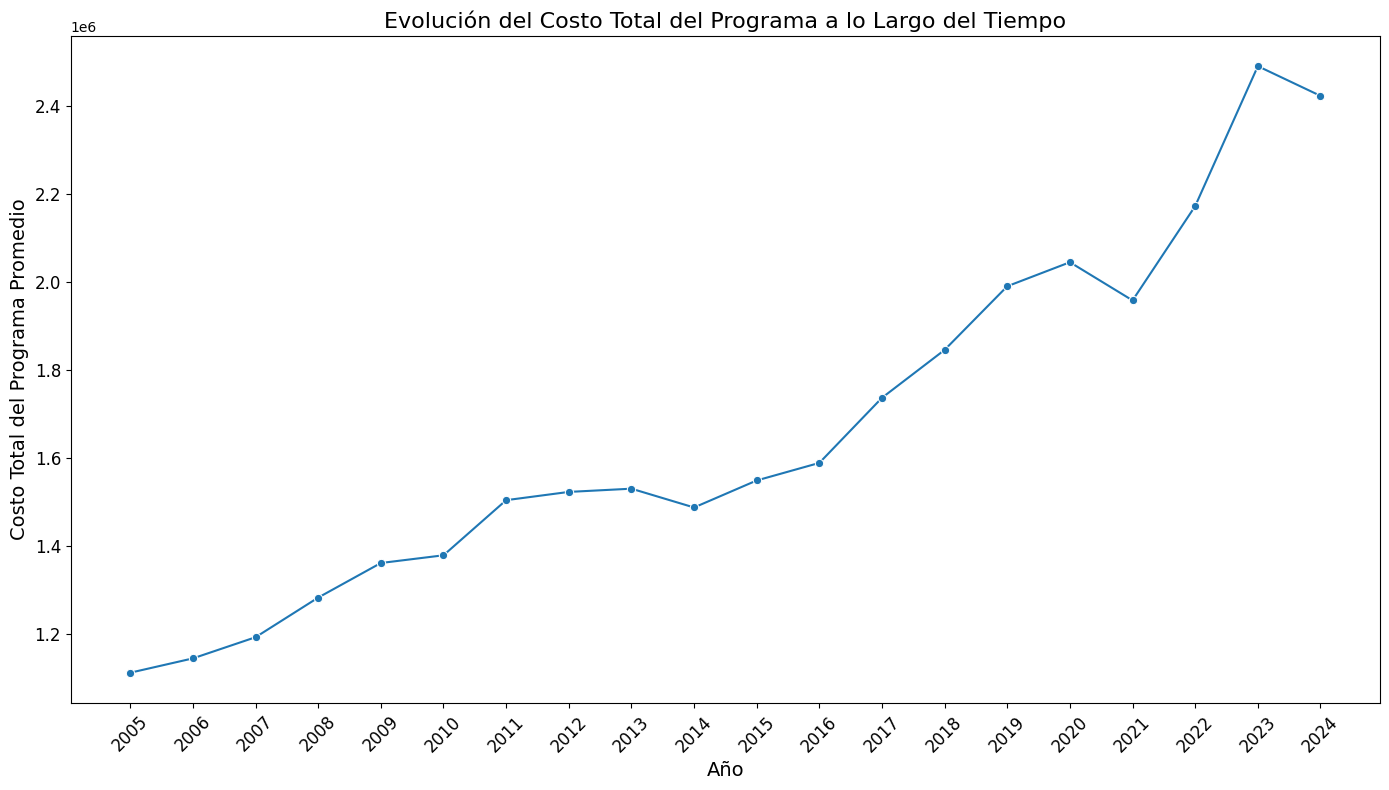

In [18]:
# Agrupar los datos por año y calcular el costo total del programa promedio por año
costo_total_programa_anio = df_clean.groupby('Anio')['Costo_Total_Programa'].mean().reset_index()

# Crear el gráfico de línea para mostrar la evolución del costo total del programa a lo largo del tiempo
plt.figure(figsize=(14, 8))
sns.lineplot(x='Anio', y='Costo_Total_Programa', data=costo_total_programa_anio, marker='o')

# Configurar título y etiquetas
plt.title('Evolución del Costo Total del Programa a lo Largo del Tiempo', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Costo Total del Programa Promedio', fontsize=14)
plt.xticks(costo_total_programa_anio['Anio'], rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 3.16) Grafico de barras del costo total (mediana) del programa por macrozona del país

El gráfico de barras muestra la mediana del costo total del programa por macrozona, excluyendo la Región Metropolitana. Es útil para identificar la variabilidad en los costos educativos entre diferentes macrozonas.

C:\Users\jcast\AppData\Local\Temp\ipykernel_11352\2193446994.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Costo_Total_Programa', y='Macrozona', data=costo_total_programa_macrozona, palette='viridis')


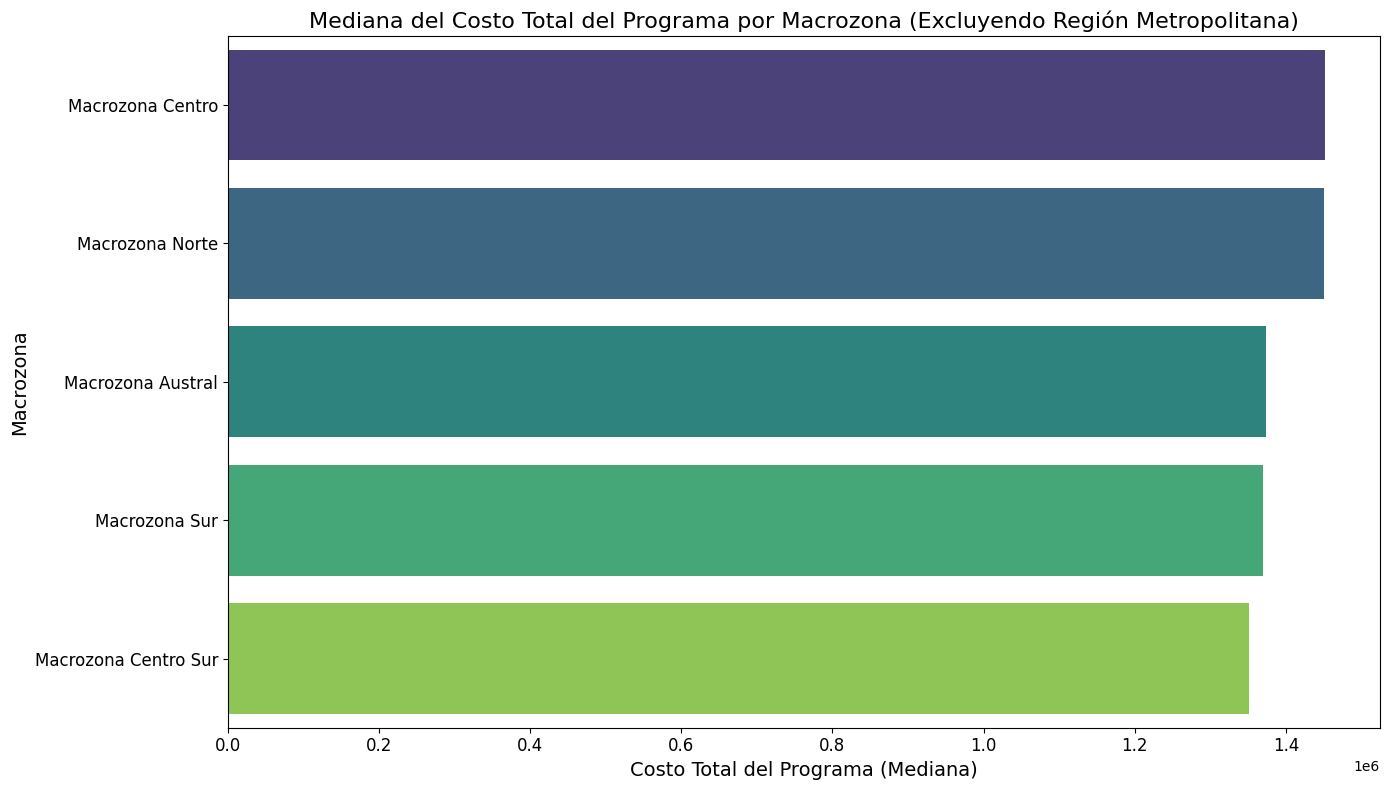

In [25]:
import seaborn as sns

# Excluir la Región Metropolitana
df_clean_excl_metropolitana = df_clean[df_clean['Macrozona'] != 'Region Metropolitana']

# Agrupar los datos por macrozona y calcular la mediana del costo total del programa por macrozona
costo_total_programa_macrozona = df_clean_excl_metropolitana.groupby('Macrozona')['Costo_Total_Programa'].median().reset_index()

# Ordenar los datos de mayor a menor
costo_total_programa_macrozona = costo_total_programa_macrozona.sort_values(by='Costo_Total_Programa', ascending=False)

# Crear el gráfico de barras para mostrar la mediana del costo total del programa por macrozona
plt.figure(figsize=(14, 8))
sns.barplot(x='Costo_Total_Programa', y='Macrozona', data=costo_total_programa_macrozona, palette='viridis')

# Configurar título y etiquetas
plt.title('Mediana del Costo Total del Programa por Macrozona (Excluyendo Región Metropolitana)', fontsize=16)
plt.xlabel('Costo Total del Programa (Mediana)', fontsize=14)
plt.ylabel('Macrozona', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()

### 3.17 Grafico de barras del costo total promedio del programa por Region

C:\Users\jcast\AppData\Local\Temp\ipykernel_11352\2870315230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Costo_Total_Programa', y='Nombre_Region', data=costo_total_programa_region, palette='viridis')


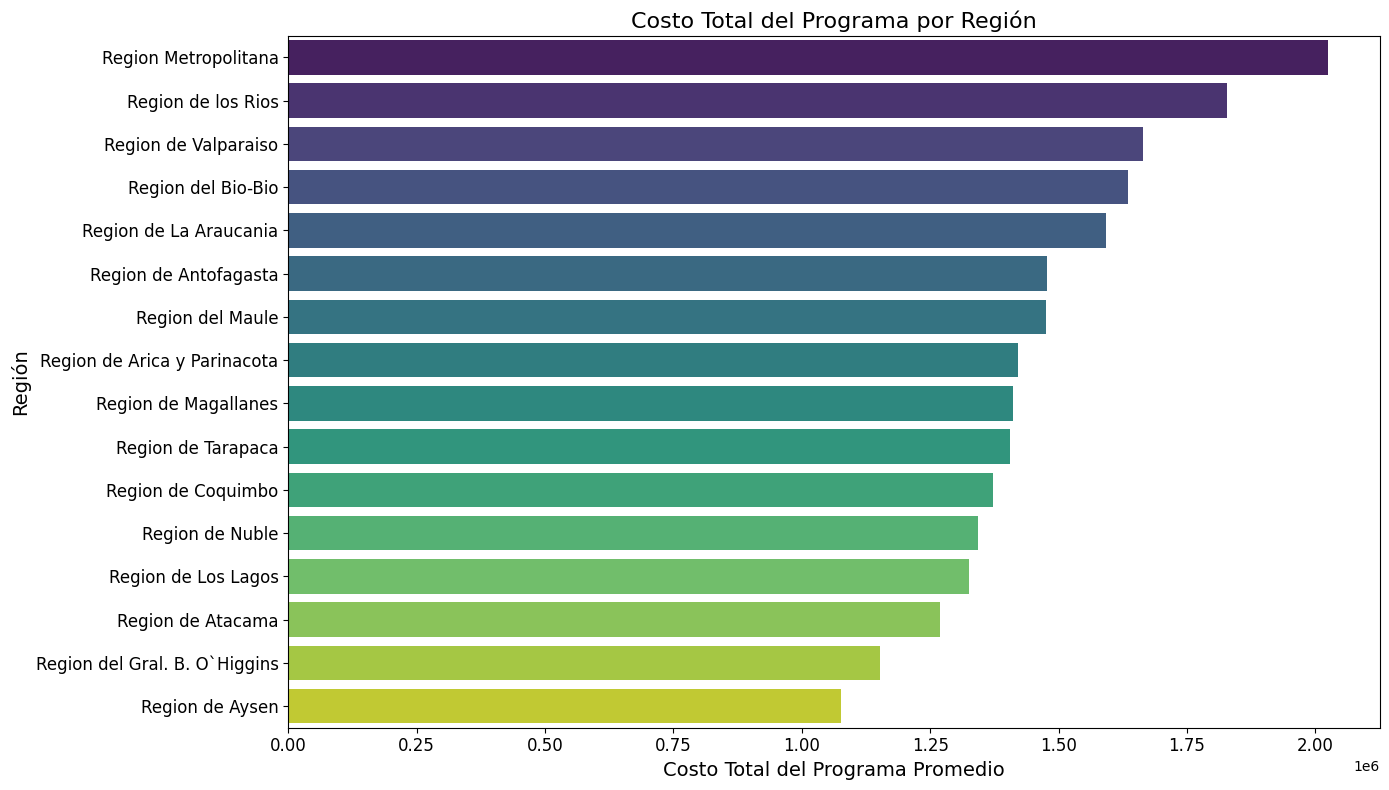

In [21]:
# Agrupar los datos por región y calcular el costo total del programa promedio por región
costo_total_programa_region = df_clean.groupby('Nombre_Region')['Costo_Total_Programa'].mean().reset_index()

# Ordenar los datos de mayor a menor
costo_total_programa_region = costo_total_programa_region.sort_values(by='Costo_Total_Programa', ascending=False)

# Crear el gráfico de barras para mostrar el costo total del programa por región
plt.figure(figsize=(14, 8))
sns.barplot(x='Costo_Total_Programa', y='Nombre_Region', data=costo_total_programa_region, palette='viridis')

# Configurar título y etiquetas
plt.title('Costo Total del Programa por Región', fontsize=16)
plt.xlabel('Costo Total del Programa Promedio', fontsize=14)
plt.ylabel('Región', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()